In [8]:
import torch
from qtorch_plus.quant import posit_quantize

x = torch.tensor([-4.15, -16, -2.5, 234, 0.23], dtype=torch.float32)
y = posit_quantize(x, nsize=4, es=0, scale=1.0)
print(y)


tensor([-4.0000, -4.0000, -2.0000,  4.0000,  0.2500])


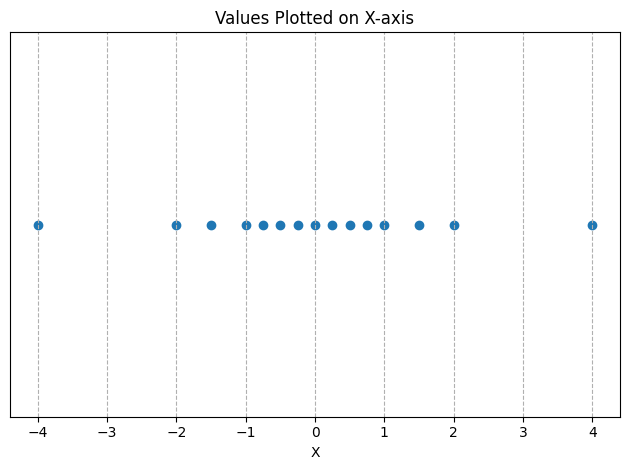

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Values
vals = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2, 4])
x = np.concatenate([-vals[::-1][:-1], vals])  # avoid duplicate 0
y = np.zeros_like(x)

# Plot
plt.figure()
plt.scatter(x, y, marker='o')
plt.yticks([])  # Hide y-axis ticks
plt.grid(True, axis='x', linestyle='--')
plt.title('Values Plotted on X-axis')
plt.xlabel('X')
plt.tight_layout()
plt.show()


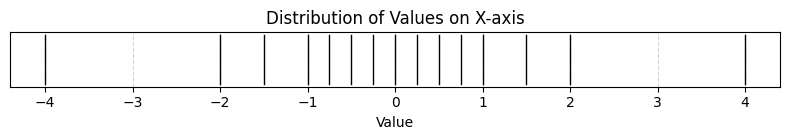

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Values (include both negative and positive, avoid duplicate 0)
vals = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2, 4])
x = np.concatenate([-vals[::-1][:-1], vals])  # Symmetric without duplicating 0

# Plot rug-style distribution
plt.figure(figsize=(8, 1.5))
for val in x:
    plt.plot([val, val], [0, 1], color='black', linewidth=1)

plt.yticks([])  # Hide y-axis
plt.xlabel('Value')
plt.title('Distribution of Values on X-axis')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


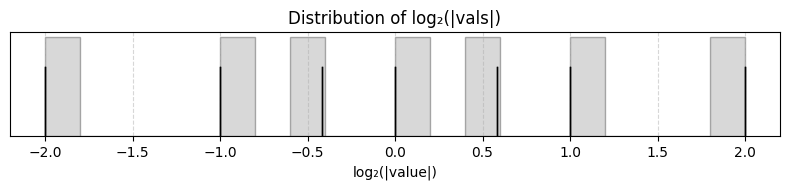

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Values (excluding 0 because log2(0) is undefined)
vals = np.array([0.25, 0.5, 0.75, 1, 1.5, 2, 4])
signed_vals = np.concatenate([-vals[::-1], vals])  # symmetric without zero

# Take absolute value, then log2
abs_vals = np.abs(signed_vals)
log_vals = np.log2(abs_vals)

# Plot distribution
plt.figure(figsize=(8, 2))

# Histogram
plt.hist(log_vals, bins=20, alpha=0.3, color='gray', edgecolor='black', density=True)

# Rug plot
for val in log_vals:
    plt.plot([val, val], [0, 0.5], color='black', linewidth=1)

plt.yticks([])
plt.xlabel('log₂(|value|)')
plt.title('Distribution of log₂(|vals|)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
